## **Libraries**

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
import seaborn as sns
sns.set()

## **Data**

In [2]:
# Load raw data
df_purchase = pd.read_csv(os.path.join("..", "data", "purchase_data.csv"))

## **Exploration**

In [3]:
# Check the first rows
df_purchase.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0


In [4]:
# Check for missing values
df_purchase.isnull().sum()

ID                   0
Day                  0
Incidence            0
Brand                0
Quantity             0
Last_Inc_Brand       0
Last_Inc_Quantity    0
Price_1              0
Price_2              0
Price_3              0
Price_4              0
Price_5              0
Promotion_1          0
Promotion_2          0
Promotion_3          0
Promotion_4          0
Promotion_5          0
Sex                  0
Marital status       0
Age                  0
Education            0
Income               0
Occupation           0
Settlement           0
dtype: int64

## **Segmentation**

### **Model**

In [5]:
# Load pickled objects in order to segment the purchase data
kmeans_pca = pickle.load(open(os.path.join("utils", "kmeans_pca.pickle"), "rb"))
pca = pickle.load(open(os.path.join("utils", "pca.pickle"), "rb"))
scaler = pickle.load(open(os.path.join("utils", "scaler.pickle"), "rb"))

### **Standardization**

In [6]:
# Standardize the purchase data like for segmentation data
features = df_purchase[["Sex", "Marital status", "Age", "Education", "Income", "Occupation", "Settlement"]]
df_segm_std = scaler.transform(features)

### **PCA**

In [7]:
# Apply PCA on the purchase data to obtain three principal components for each row in the table
df_segm_pca = pca.transform(df_segm_std)

### **K-Means (PCA)**

In [8]:
# Segment the purchase data into the four segments using the principal component analysis
pca_segments = kmeans_pca.predict(df_segm_pca)

In [9]:
# Create a copy to keep original data
df_predictors = df_purchase.copy()

In [10]:
# Add segment information as a new column in our predictors data
df_predictors["Segment"] = pca_segments

## **Analysis**

### **Customers**

In [11]:
# Explore the first rows
df_predictors.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,2
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,2
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2


In [12]:
# Compute purchase occasions by customer
temp1 = df_predictors[["ID", "Incidence"]].groupby(["ID"], as_index = False).count()
temp1 = temp1.set_index("ID")
temp1 = temp1.rename(columns = {"Incidence": "Visits"})
temp1.head()

,Visits
ID,
200000001,101
200000002,87
200000003,97
200000004,85
200000005,111


In [13]:
# Compute number of purchases per customer
temp2 = df_predictors[["ID", "Incidence"]].groupby(["ID"], as_index = False).sum()
temp2 = temp2.set_index("ID")
temp2 = temp2.rename(columns = {"Incidence": "Purchases"})
temp3 = temp1.join(temp2)
temp3.head()

,Visits,Purchases
ID,,
200000001,101,9
200000002,87,11
200000003,97,10
200000004,85,11
200000005,111,13


In [14]:
# Compute the average number of purchases by customer
temp3["Average Purchases"] = temp3["Purchases"] / temp3["Visits"]
temp3.head()

,Visits,Purchases,Average Purchases
ID,,,
200000001,101,9,0.089109
200000002,87,11,0.126437
200000003,97,10,0.103093
200000004,85,11,0.129412
200000005,111,13,0.117117


In [15]:
# Obtain the segment for each customer in the data set
temp4 = df_predictors[["ID", "Segment"]].groupby(["ID"], as_index = False).mean()
temp4 = temp4.set_index("ID")
df_description = temp3.join(temp4)
df_description.head()

,Visits,Purchases,Average Purchases,Segment
ID,,,,
200000001,101,9,0.089109,2
200000002,87,11,0.126437,3
200000003,97,10,0.103093,2
200000004,85,11,0.129412,2
200000005,111,13,0.117117,1


### **Segments**

In [16]:
# Calculate the proportions of each segment and set the appropriate column name
segment_proportion = df_description[["Purchases", "Segment"]].groupby(["Segment"]).count() / df_description.shape[0]
segment_proportion = segment_proportion.rename(columns = {"Purchases": "Proportions"})
segment_proportion.head()

,Proportions
Segment,
0,0.206
1,0.220
2,0.378
3,0.196


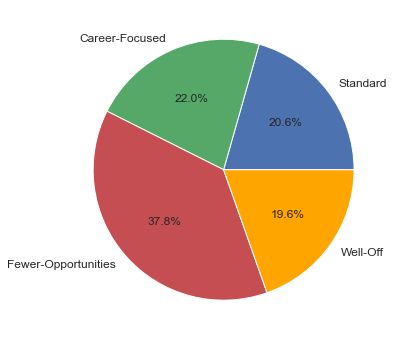

In [17]:
# Plot the segment proportions as a pie chart
plt.figure(figsize = (9, 6))
plt.pie(segment_proportion["Proportions"],
        labels = ["Standard", "Career-Focused", "Fewer-Opportunities", "Well-Off"],
        autopct = "%1.1f%%",
        colors = ["b", "g", "r", "orange"],
        textprops = {"fontsize": 12})
plt.show()

### **Purchases**

In [18]:
# Calculate the mean by the four segments to determine the average customer behaviour in each segment
segments_mean = df_description.groupby(["Segment"]).mean()
segments_mean

,Visits,Purchases,Average Purchases
Segment,,,
0,117.699029,24.902913,0.212773
1,123.454545,39.827273,0.283102
2,113.730159,22.756614,0.201588
3,117.295918,34.602041,0.284478


In [19]:
# Calculate the standard deviation by segments to determine how homogoneus each of the segments is
segments_std = df_description.groupby(["Segment"]).std()

Text(0, 0.5, 'Store Visits')

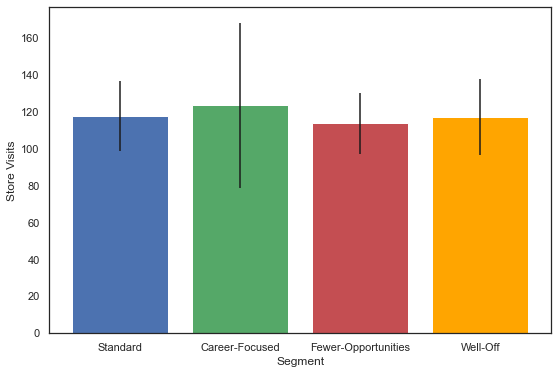

In [20]:
# Plot the average number of store visits for each of the four segments using a bar chart
plt.figure(figsize = (9, 6))
sns.set_style("white")
plt.bar(x = (0, 1, 2, 3),
        tick_label = ("Standard", "Career-Focused", "Fewer-Opportunities", "Well-Off"), 
        height = segments_mean["Visits"],
        yerr = segments_std["Visits"], # Display the standard deviation as a straight line
        color = ("b", "g", "r", "orange"))
plt.xlabel("Segment", fontsize = 12)
plt.ylabel("Store Visits", fontsize = 12)

Text(0, 0.5, 'Purchase Incidences')

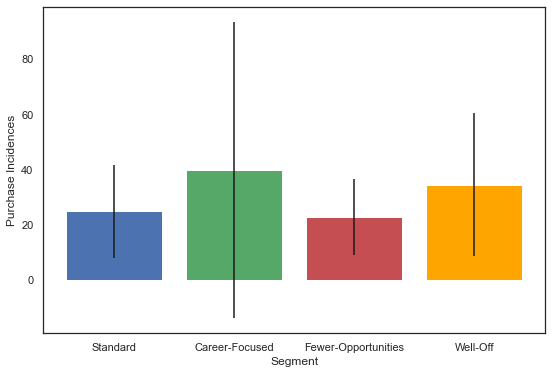

In [21]:
# Plot the average number of purchases by segments to understand how often each group buys the product
plt.figure(figsize = (9, 6))
sns.set_style("white")
plt.bar(x = (0, 1, 2, 3),
        tick_label = ("Standard", "Career-Focused", "Fewer-Opportunities", "Well-Off"), 
        height = segments_mean["Purchases"],
        yerr = segments_std["Purchases"], # Display the standard deviation as a straight line
        color = ("b", "g", "r", "orange"))
plt.xlabel("Segment", fontsize = 12)
plt.ylabel("Purchase Incidences", fontsize = 12)

### **Brand**

In [22]:
# Select rows where the incidence column equals 1 that indicates times when a purchase was made
df_incidence = df_predictors[df_predictors["Incidence"] == 1]

In [23]:
# Create dummies for each of the five brands
brand_dummies = pd.get_dummies(df_incidence["Brand"], prefix = "Brand", prefix_sep = "_")
brand_dummies["Segment"], brand_dummies["ID"] = df_incidence["Segment"], df_incidence["ID"]
brand_dummies

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Segment,ID
6,0,1,0,0,0,2,200000001
11,0,0,0,0,1,2,200000001
19,1,0,0,0,0,2,200000001
24,0,0,0,1,0,2,200000001
29,0,1,0,0,0,2,200000001
...,...,...,...,...,...,...,...
58621,0,1,0,0,0,2,200000500
58648,1,0,0,0,0,2,200000500
58674,0,1,0,0,0,2,200000500
58687,0,1,0,0,0,2,200000500


In [24]:
# Group the dummies by the customer column and calculate the mean for each group
temp = brand_dummies.groupby(["ID"], as_index = True).mean()

# Group the dummies by segment and calculate the mean brand choice for each of them
mean_choice = temp.groupby(["Segment"], as_index = True).mean()

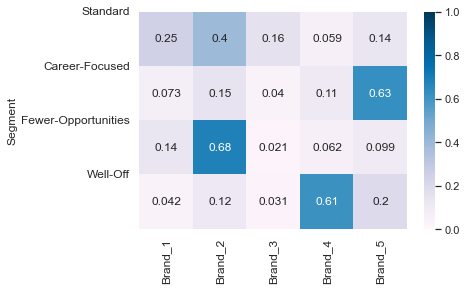

In [25]:
# Plot the mean brand choice by segment
sns.heatmap(mean_choice,
            vmin = 0,
            vmax = 1,
            cmap = "PuBu",
            annot = True)
plt.xticks(rotation = 90, fontsize = 12)
plt.yticks([0, 1, 2, 3],
           ["Standard", "Career-Focused", "Fewer-Opportunities", "Well-Off"],
           rotation = 0,
           fontsize = 12)
plt.show()

### **Revenue**

In [26]:
# Compute the revenue for the first brand
temp = df_predictors[df_predictors["Brand"] == 1]
temp.loc[:, "Revenue Brand 1"] = temp["Price_1"] * temp["Quantity"] # Create a new column by multiplying price and quantity for each row
segment_revenue = pd.DataFrame()
segment_revenue[["Segment", "Revenue Brand 1"]] = temp[["Segment", "Revenue Brand 1"]].groupby(["Segment"], as_index=False).sum()

c:\Users\luca.saccilotto\AppData\Local\miniconda3\envs\customer-segmentation\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
c:\Users\luca.saccilotto\AppData\Local\miniconda3\envs\customer-segmentation\lib\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [27]:
# Compute the revenue for the second brand by using the same formula
temp = df_predictors[df_predictors["Brand"] == 2]
temp.loc[:, "Revenue Brand 2"] = temp["Price_2"] * temp["Quantity"]
segment_revenue[["Segment", "Revenue Brand 2"]] = temp[["Segment", "Revenue Brand 2"]].groupby(["Segment"], as_index = False).sum()

c:\Users\luca.saccilotto\AppData\Local\miniconda3\envs\customer-segmentation\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
c:\Users\luca.saccilotto\AppData\Local\miniconda3\envs\customer-segmentation\lib\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [28]:
# Compute the revenue for the third brand by using the same formula
temp = df_predictors[df_predictors["Brand"] == 3]
temp.loc[:, "Revenue Brand 3"] = temp["Price_3"] * temp["Quantity"]
segment_revenue[["Segment", "Revenue Brand 3"]] = temp[["Segment", "Revenue Brand 3"]].groupby(["Segment"], as_index = False).sum()

c:\Users\luca.saccilotto\AppData\Local\miniconda3\envs\customer-segmentation\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
c:\Users\luca.saccilotto\AppData\Local\miniconda3\envs\customer-segmentation\lib\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [29]:
# Compute the revenue for the fourth brand by using the same formula
temp = df_predictors[df_predictors["Brand"] == 4]
temp.loc[:, "Revenue Brand 4"] = temp["Price_4"] * temp["Quantity"]
segment_revenue[["Segment", "Revenue Brand 4"]] = temp[["Segment", "Revenue Brand 4"]].groupby(["Segment"], as_index = False).sum()

c:\Users\luca.saccilotto\AppData\Local\miniconda3\envs\customer-segmentation\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
c:\Users\luca.saccilotto\AppData\Local\miniconda3\envs\customer-segmentation\lib\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [30]:
# Compute the revenue for the fifth brand by using the same formula
temp = df_predictors[df_predictors["Brand"] == 5]
temp.loc[:, "Revenue Brand 5"] = temp["Price_5"] * temp["Quantity"]
segment_revenue[["Segment", "Revenue Brand 5"]] = temp[["Segment", "Revenue Brand 5"]].groupby(["Segment"], as_index = False).sum()

c:\Users\luca.saccilotto\AppData\Local\miniconda3\envs\customer-segmentation\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
c:\Users\luca.saccilotto\AppData\Local\miniconda3\envs\customer-segmentation\lib\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [31]:
# Compute the total revenue by summing the revenue for each of the five brands
segment_revenue["Total Revenue"] = (segment_revenue["Revenue Brand 1"] +
                                    segment_revenue["Revenue Brand 2"] +
                                    segment_revenue["Revenue Brand 3"] +
                                    segment_revenue["Revenue Brand 4"] +
                                    segment_revenue["Revenue Brand 5"])
segment_revenue

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue
0,0,2611.19,4768.52,3909.17,861.38,2439.75,14590.01
1,1,736.09,1746.42,664.75,2363.84,19441.06,24952.16
2,2,2258.90,13955.14,716.25,1629.31,2230.50,20790.10
3,3,699.47,1298.23,731.35,14185.57,5509.69,22424.31


In [32]:
# Modify the table to see the size of the segment compared to the revenue they bring
segment_revenue["Proportions"] = segment_proportion["Proportions"]
segment_revenue["Segment"] = segment_revenue["Segment"].map({0:"Standard",
                                                            1:"Career-Focused",
                                                            2:"Fewer-Opportunities",
                                                            3:"Well-Off"})
segment_revenue = segment_revenue.set_index(["Segment"])
segment_revenue

,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue,Proportions
Segment,,,,,,,
Standard,2611.19,4768.52,3909.17,861.38,2439.75,14590.01,0.206
Career-Focused,736.09,1746.42,664.75,2363.84,19441.06,24952.16,0.220
Fewer-Opportunities,2258.90,13955.14,716.25,1629.31,2230.50,20790.10,0.378
Well-Off,699.47,1298.23,731.35,14185.57,5509.69,22424.31,0.196
